<a href="https://colab.research.google.com/github/avigyan24/Deep_Learning_topics/blob/main/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[0]

5

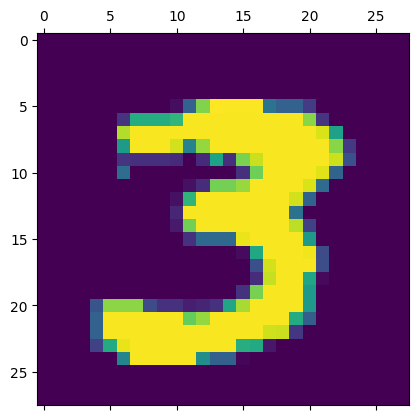

In [ ]:
plt.matshow(X_train[27])

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='leaky_relu'),
    keras.layers.Dense(50,activation='leaky_relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2752 - accuracy: 0.9206
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1278 - accuracy: 0.9614
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0916 - accuracy: 0.9718
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0706 - accuracy: 0.9781
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0596 - accuracy: 0.9813


In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0898 - accuracy: 0.9720


[0.08976130932569504, 0.972000002861023]

In [ ]:
y_predicted=model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([3.1704825e-01, 4.0392586e-04, 8.7314606e-01, 9.9588174e-01,
       1.5529020e-04, 1.3244105e-02, 6.4669034e-06, 9.9999738e-01,
       5.0082751e-02, 6.9564682e-01], dtype=float32)

In [ ]:
np.argmax(y_predicted[0])

7

In [ ]:
y_predicted.shape

(10000, 10)

In [ ]:
Predicted_value=[np.argmax(i) for i in y_predicted]
cnn=tf.math.confusion_matrix(labels=y_test,predictions=Predicted_value)

Text(95.72222222222221, 0.5, 'Actual')

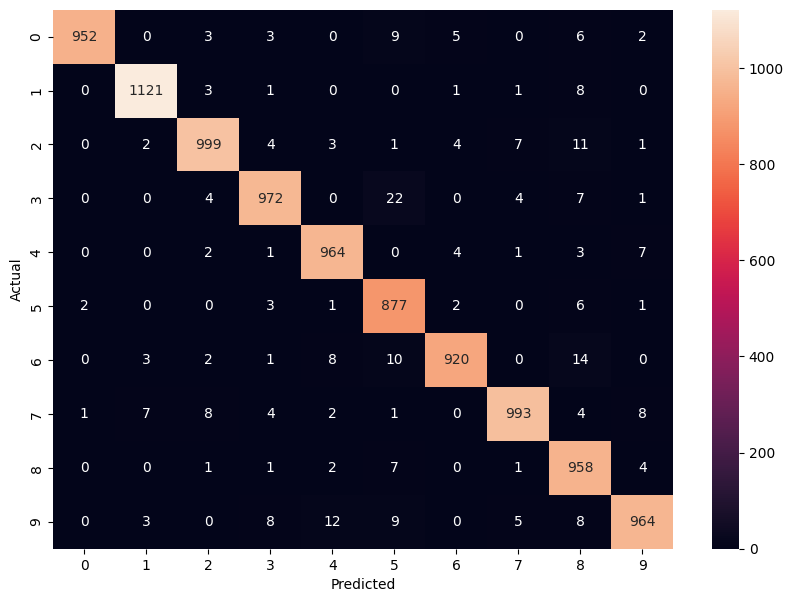

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cnn,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
#implementing mse for practice nothing to do with digit recognition

y_predicted=np.array([1,1,0,0,1])
y_true=np.array([0.30,0.7,1,0,0.5])

In [ ]:
def mse(y_predicted,y_true):
  total_error=0
  for yp,yt in zip(y_predicted,y_true):
    total_error+=pow(abs(yt-yp),2)
  return total_error/len(y_predicted)

In [ ]:
print(f"MSE using function {mse(y_predicted,y_true)}")

MSE using function 0.366


In [ ]:
mse=np.mean(pow(np.abs(y_predicted-y_true),2))
print(f"MSE using numpy {mse}")

MSE using numpy 0.366
